21 de Octubre, 2020 
**ENEI, Lima, Perú - Taller Práctico: Aprendizaje de Máquinas en Imágenes Satelitales para el cálculo de un indicador ODS**  
## Caso práctico: Imágenes satelitales para medir un Objetivo de Desarrollo Sostenible


<br>

<div class="container-fluid" align="middle">
	<div class="row" align="middle">
		<div class="col-md-6">
			<img alt="Bootstrap Image Preview" src="https://raw.githubusercontent.com/RodrigoLaraMolina/TT-MIT2018/master/Logo&Text_standardtransparent.png" style ="height:200px" />
		</div>
		<div class="col-md-6" align="middle">
			<img alt="Bootstrap Image Preview" src="https://seeklogo.com/images/I/inei-logo-BC34B0BF98-seeklogo.com.png" style ="height:140px" />
		</div>
    
</div>

**Objetivos**
- Comprender  el ODS 11.3.1 y entender la pertinencia del AM supervisado
- Introducir la ingeniería de datos y su relación con la ciencia de datos
- Ahondar sobre las fuentes de información que serán utilizadas en el caso práctico
- Entender cómo se automatiza el preprocesamiento de las imágenes satelitales

## Introducción
- Definir el ODS y entender la pertinencia del AM supervisado [15 min]
- Mostrar la estructura de las sesiones I y II [5 min]
- Lanzar Jupyter [15 min]

### ODS 11.3.1
#### La expansión urbana

In [1]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video height="400 px" controls>
      <source src="./video/Mexico.mp4" type="video/mp4">
</video>
</div>
""")

In [2]:
HTML("""
<div align="middle">
<video height="400 px" controls>
      <source src="./video/SaoPaulo.mp4" type="video/mp4">
</video>
</div>
""")

#### Consecuencias de una expansión urbana acelerada  

<div align="middle">
<img src="img/consec.png" alt="Nations Unies Tunisie logo" style="width: 90%;" align="center" frameborder="200"/>
</div>

#### ODS 11
<div align="middle">
<img src="img/ODS11.png" alt="Nations Unies Tunisie logo" style="width: 90%;" align="center" frameborder="200"/>
</div>

#### ODS 11
<div align="middle">
<img src="img/def_ods11.png" alt="Nations Unies Tunisie logo" style="width: 90%;" align="center" frameborder="200"/>
</div>

### Por qué utilizar Aprendizaje de Máquinas Supervisado?

<div align="middle">
<img src="img/why_ml.png" alt="Nations Unies Tunisie logo" style="width: 90%;" align="center" frameborder="200"/>
</div>

### Estructura del Caso Práctico

El taller está estructurado en dos sesiones:  
- Parte I: Procesamiento (1h 30 min)
- Parte II: Análisis (2h)

<div align="middle">
<img src="https://raw.githubusercontent.com/fatoundy/DataPop/master/003x.png" alt="Stages 1" style="width: 450px;" align="center"/>
</div>
     <!---\todo: change image--->


### Lanzar Jupyter

#### Comandos Principales 
- Qué es el número de la izquierda en las slides 'Code' ([In\[n\]]())?
     - Sirven para recordarnos el orden en que las celdas de código son ejecutadas
- Cómo puedo ver si Jupyter está trabajando?
     - Mirar el circulo arriba a la derecha
         - perro. gato
         
- Quels sont les raccourcis clavier les plus utiles? Cuales son los atajos de teclado **más útiles**?
     - (mode commande/édition) `<Ctrl + Entrée>`: cellule d'exécution (modo commando/edición) `<Ctrl + Enter>`: ejecutar la celda
     - (mode Commande/édition) `<Shift + Enter>`: exécuter la cellule et passer à la suivante(modo commando/edición) `<Shift + Enter>`: ejecutar la celda y pasar a la siguiente

- Como reconozco los modes de edición y de comandos?
    - Cuando el recuadro es <font color='green'> **verde** </font> es modo de <font color='green'> **edición** </font> 
    - Cuando el recuadro es <font color='blue'> **azul** </font> es modo de <font color='blue'> **comando** </font>
    
- Cómo puedo cambiar de modo?
     - `<Escape>` para el modo <font color='blue'> **comando** </font>
     - `<Enter>` para el modo <font color='green'> **edición** </font>

- Qué otros atajos de teclado pueden ser útiles?
     - `<a>`: insertar una celda de código arriba
     - `<b>`: insertar una celda de código abajo
- Cómo puedo ver el texto de ayuda?
     - Ponga su cursor en cima de la función de interés y presione `<Shift>+<Tab>`      

#### Configurar el ambiente de desarrollo

**Importador de bibliotecas e instalador de dependencias**

La primera parte de cualquier _rutina_ `Python` consiste en importar los paquetes o librerías necesarias para nuestro trabajo.

     "Las librerías son como una caja de herramientas con las que se puede trabajar mejor"
<br>




<div class="container-fluid" align="middle">
	<div class="row" align="middle">
		<div class="col-md-6" align="right">
            <img src="https://raw.githubusercontent.com/RodrigoLaraMolina/DPATTSrc/master/python_toolbox.png" alt="Toolbox" style="width: 350px;" align="right" frameborder="200"/>
        </div>
        <div class="col-md-6" align="left">
            <img src="https://raw.githubusercontent.com/RodrigoLaraMolina/DPATTSrc/master/packages.png" alt="Packages" style="width: 550px;" align="left" frameborder="200"/>
        </div>
    </div>
</div>

In [1]:
# magic habituelle
# permet d'afficher des graphiques sur le notebook
# %matplotlib inline
# permet de recharger les modules importés avant chaque exécution
%load_ext autoreload
%autoreload 2

# importer les packages nécessaires utilisés tout au long du tutoriel
from IPython.display import display 
import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
plt.ioff()

In [2]:
# import some custom functions to visualize results
from utils.d1_functions import plot_city_prediction_ground_truth#, \
    # plot_city_prediction, plot_prediction_labels

## Fuentes De Información
**Objetivo:**  
- Presentar las fuentes de información [15 min]  

### Landsat 8
- visualizar en python (interactivo)

#### Composición de imágenes Landsat 8

Las imágenes del Landsat 8 están compuestas por 11 bandas espectrales que recopilan información sobre los materiales que se observan en diferentes bandas de frecuencia.

<div align="middle">
<img src="https://raw.githubusercontent.com/RodrigoLaraMolina/DPATTSrc/master/L8_bands.png" alt="Landsat 8 bandes" style="width: 600px;" align="center" frameborder="200"/>
</div>

#### Visualización de bandas únicas
Los materiales observados en la superficie tienen un valor de luminosidad en cada banda registrada por la cámara multiespectral.

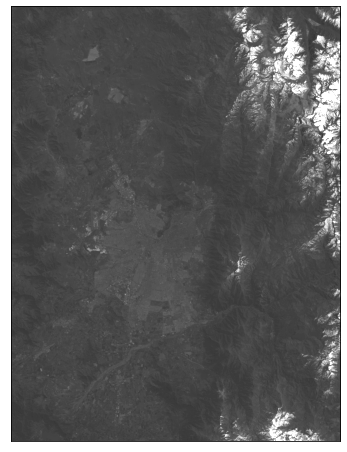

In [3]:
from utils.functions_viz import plot_single_band
 
plot_single_band('Santiago', 3, path_db_img='./media/DATA/Landsat/db/img/UF_unscaled_bbox', color_scale='gray')

#### Visualización de combinación de bandas 
Las bandas espectrales que se usan en las cámaras normales son las rojas, verdes y azules:

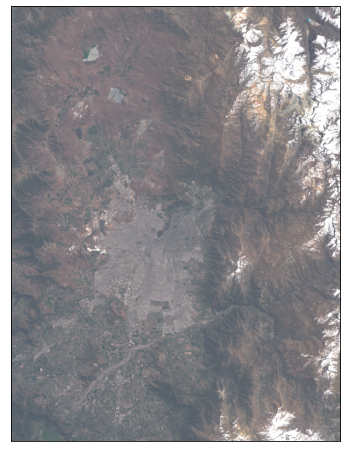

In [4]:
from utils.functions_viz import plot_band_combination
plot_band_combination('Santiago', path_db_img = './media/DATA/Landsat/db/img/UF_unscaled_bbox', 
                      saturation_coeff=.3
                     )

### Atlas de Expansión Urbana
El Atlas de la expansión urbana es un proyecto de la Universidad de Nueva York, el Instituto Lincoln de Políticas de Suelo y ONU-Habitat que ha estudiado 200 ciudades de todo el mundo. Esta muestra de ciudades fue diseñada para ser representativa de las ciudades con más de 100 mil habitantes.

<img src="https://raw.githubusercontent.com/RodrigoLaraMolina/DPATTSrc/master/atlas.png" alt="Sample of cities - Atlas of Urban expansion" style="width: 700px;" align="center" frameborder="200"/>

<div class="container-fluid" align="middle">
	<div class="row" align="middle">
		<div class="col-md-8">
			<font color='gray'> <em>“Para el Atlas, utilizamos imágenes sin nubes de los satélites Landsat 5 (1984), Landsat 6 (1993), Landsat 7 (1999) y Landsat 8 (2013). […] Estas imágenes tienen varias bandas espectrales que se pueden usar para identificar superficies impermeables que corresponden aproximadamente a áreas edificadas, así como a superficies de agua. Esto hace posible clasificarlos mediante <font color='black'> <b>algoritmos asistidos por humanos</b></font> en tres clases con un alto grado de precisión: <font color='black'><b>superficie construida, espacio abierto </b></font>y <font color='black'><b>agua</b></font>.” </em> </font> <br>
<strong>Fuente:</strong> Angel et al. Atlas of Urban Expansion—2016 Edition, Volume 1: Areas and Densities. Ch. 3. New York University, UN-Habitat and Lincoln Institute of Land Policy, 2016
		</div>
		<div class="col-md-4" align="middle">
			<img alt="Bootstrap Image Preview" src="http://atlasofurbanexpansion.org/file-manager/userfiles/About/Solly_300px.jpg" style ="height:150px" />
		</div>
	</div>
</div>

Las primeras dos categorias, i.e. **superficie urbana** y **espacio abierto** se subdividen en 3 tipos  
  <br>
  
  
<div class="container-fluid" align="middle">
	<div class="row" align="middle">
		<div class="col-md-6">
            <p>
            <center><b>Superficie  construida</b> </center>
                <ul>
                  <li>superficie construida urbana</li>
                  <li>superficie construida suburbana</li>
                  <li>superficie construida rural</li>
                </ul> 
            </p>
        	</div>
    <div class="row" align="middle">
		<div class="col-md-6" align="middle">
            <p>
			<center><b>Espacio abierto</b></center> 
            <ul>
              <li>espacio abierto urbanizado</li>
              <li>espacio abierto capturado</li>
              <li>espacio abierto rural</li>
            </ul> </p>
	</div>
</div>
        

            

<div class="container-fluid" align="middle">
<div class="row" align="middle">
		<div class="col-md-6">
            <p>
            <center>Así nuestras <b>etiquetas</b> se componen de 7 clases </center>
                <ol>
                    <li>superficie construida urbana</li>
                    <li>superficie construida suburbana</li>
                    <li>superficie construida rural</li>
                    <li>espacio abierto urbanizado</li>
                    <li>espacio abierta capturada</li>
                    <li>espacio abierta rural</li>
                    <li>agua</li>
                </ol> 
            </p>
        	</div>
    <div class="row" align="middle">
		<div class="col-md-6" align="middle">
            <p>
			<center>Por simplicidad sólo clasificaremos <b>3 clases</b></center> 
            <ol>
              <li>superficie construida</li>
              <li>espacio abierto</li>
              <li>agua</li>
            </ol> </p>
	</div>
</div>

<!---\todo: right div va center--->


#### Etiquetas originales

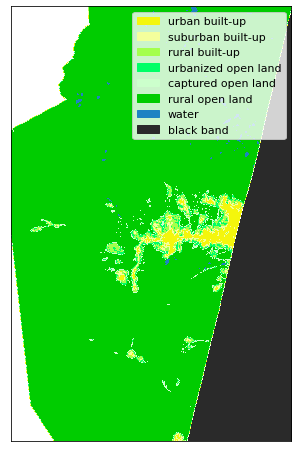

In [5]:
from utils.functions_viz import plot_city_labels
plot_city_labels(
    'Cochabamba', path_db_lab = "./media/DATA/Landsat/db/lab/NYU-UF/", 
    path_db_img = "./media/DATA/Landsat/db/img/UF_unscaled_bbox/",
    # show_bb = False, 
)

#### Etiquetas transformadas

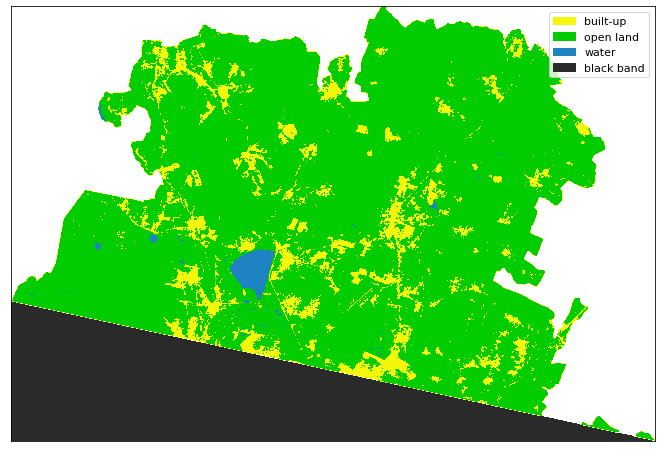

In [6]:
from utils.functions_viz import plot_city_labels
plot_city_labels(
    'Mexico', path_db_lab = "./media/DATA/Landsat/db/lab/NYU-UF/", 
    path_db_img = "./media/DATA/Landsat/db/img/UF_unscaled_bbox/",
    map_labels=True,
    # show_bb = True, 
)

### Combinando ambas fuentes
Así al superponer las etiquetas a las imágenes de Landsat 8 como se muestra en la siguiente figura se obtener un conjunto de **píxeles etiquetados**.

<img src="https://raw.githubusercontent.com/RodrigoLaraMolina/DPATTSrc/master/Santiago_labels.png" alt="Santiago superposé" style="width: 400px;" align="center" frameborder="200"/>

## Preprocesamiento
**Objetivos:**  
- Mostrar los pasos superposición de etiquetas, recorte, manejo de duplicados y correcciones atmosféricas [10 min]  

### Superposición de etiquetas e imagen
En las visualizaciones anteriores pudieron observar como se ven las imágenes y las etiquetas para cada uno de las ciudades latinoamericanas del atlas. Sin embargo, dichas imágenes ya están centradas y recortadas en la zona de estudio.
 
Así se observan las etiquetas del atlas, superpuestas sobre una imagen satelital, una vez **centradas** y **recortadas**.  
<br>
<div class="container-fluid" align="middle">
	<div class="row" align="middle">
		<div class="col-md-12" align="middle">
            <img src="img/santiago_raw_superposed.png" alt="Santiago superposé" style="height:800px;" align="center"/>
        </div>
    </div>
</div>

 <br>
<div align="right">
    Este proceso de <b>centrado</b> es posible gracias al estándar existente de  <b>sistemas de coordenadas</b>
</div>   

#### Sistemas de coordenadas y proyecciones

Para poder superponer múltiples imágenes satelitales o conjuntos de etiquetas, para que efectivamente dichas fuentes de información estén describiendo una misma superficie terrestre, existen sistemas de coordenadas y proyecciones.

### Recorte de imágenes
Luego definimos como **pixeles etiquetados** sólo aquellos que tienen asignada una etiqueta en el el Atlas de Expansión Urbana. 
<br> <br>
<div class="container-fluid" align="middle">
	<div class="row" align="middle">
		<div class="col-md-7">
            <img src="img/santiago_raw_superposed.png" alt="Santiago superposé" style="height:600px;" align="center"/>
        	</div>
    <div class="row" align="middle">
		<div class="col-md-5" align="middle">
            <img src="img/santiago_bbox.png" alt="Santiago superposé" style="height:450px;" align="center"/>
	</div>
</div>
        
 <br>
<div align="right">
    Sin embargo, hay ciudades donde los pixeles etiquetados no se encuentran en una sola imagen Landsat 8...
</div>        

este es el caso de Ciudad de Mexico y de otras 6 ciudades, a las que llamaremos <b>ciudades multi-imagen</b>. 

<br>

<div class="container-fluid" align="middle">
	<div class="row" align="middle">
		<div class="col-md-6">
            <img src="img/mexico_bbox.png" alt="Santiago superposé" style="height:450px;" align="center"/>
        	</div>
    <div class="row" align="middle">
		<div class="col-md-6" align="middle">
            <img src="img/mexico2_bbox.png" alt="Santiago superposé" style="height:450px;" align="center"/>
	</div>
</div>
        
 <br>
<div align="right">
    
</div>

Naturalmente, en estos casos sólo nos quedamos con los pixeles etiquetados que no corresponden a las **bandas negras** de dichas imágenes.  
<br>

<div class="container-fluid" align="middle">
	<div class="row" align="middle">
		<div class="col-md-6">
            <img src="img/mexico_recortado.png" alt="Santiago superposé" style="height:450px;" align="center"/>
        	</div>
    <div class="row" align="middle">
		<div class="col-md-6" align="middle">
            <img src="img/mexico2_recortado.png" alt="Santiago superposé" style="height:450px;" align="center"/>
	</div>
</div>
        
 <br>

No obstante, en el caso de las **ciudades multi-imagen** además de recortar en cada imagen sólo los pixeles que están efectivamente presente en las imágenes, es decir, que no son parte de las bandas negras, es necesario tener especial cuidado con los pixeles que están presentes en más de una imagen.  
 <br>

<div class="container-fluid" align="middle">
	<div class="row" align="middle">
		<div class="col-md-12" align="middle">
            <img src="img/mexico_doubled.png" alt="Santiago superposé" style="height:400px;" align="center"/>
        </div>
    </div>
</div>

 <br>
<div align="right">
    Para asegurar que dichos pixeles están presentes sólo una vez en nuestro set de datos, se requiere un proceso de <b>gestión de duplicados</b>.
</div>

#### Gestión de duplicados

Mediante la la librería de código abierto [GDAL](https://gdal.org/) (*Geospatial Data Abstraction Library* o, Librería de Abstracción de Datos Geoespaciales), se pueden reproyectar múltiples imágenes en una sola, para así luego poder escoger cuál de los valores digitales se conservan de aquellos disponibles en más de una imagen.    
Dado que sólo se trata de 7 ciudades en las que existe más de una imagen, dicha selección se realiza de forma manual, priorizando cualitativamente la imagen que contenga menos nubes en el área duplicada. 


### Transformación Top of the Atmosphere [10 min]

**Correcciones de imagen**

Cuando es necesario analizar diferentes imágenes, es necesario realizar algunas correcciones con las condiciones de captura. Para este ejercicio, cada imagen ha sido corregida según las correcciones *Top of the Athmosphere*, lo que permite obtener la reflectividad, propiedad que depende del material que se observa y no de las condiciones de luminosidad.

<img src="https://www.researchgate.net/profile/Ximena_Tagle/publication/318325581/figure/fig2/AS:514703383773185@1499726257634/Simplified-radiance-diagram-for-an-optical-sensor-mounted-in-a-low-flying-altitude.png" alt="ToA Correction" style="width: 600px;" align="center" frameborder="200"/>
<center><strong> Fuente: </strong> Tagle, Ximena. (2017). Estudio de variaciones radiométricas en imágenes de teledetección de vehículos aéreos no tripulados para mapeo de vegetación. 10.13140 / RG.2.2.16940.36485. </center>

También es posible realizar correcciones atmosféricas topográficas y más sofisticadas que podrían implicar trabajo de campo. Estos están fuera del alcance de este ejercicio.

La corrección ***Top of the Athmosphere*** consiste en transformar los valores digitales presentes en:

- valores de *reflectancia* para las bandas del espectro solar (bandas OLI - 1 hasta 9 para Landsat 8). 
- valores de *tempeartura de brillo* para las bandas de longitud de onda térmicas (bandas TIRS - 10 y 11 para Landsat 8)

Cada imágen Landsat 8 presenta los *metadatos* necesarios para realizar la transformación:

<img src="img/image-metadata.png" alt="ToA Correction" style="width: 500px;" align="center" frameborder="200"/>
<center><strong> <br>Fuente: </strong> Elaboración propia a partir del archivo de metadatos correspondiente a la imagen de Quito, Ecuador.</center>

Para los más detalles, visite la [documentacón oficial de Landsat 8](https://www.usgs.gov/core-science-systems/nli/landsat/using-usgs-landsat-level-1-data-product).

## Recapitulemos
- Introducir el la ingeniería de datos y su relación con la ciencia de datos [10 min]
- Recapitulación y preguntas [10 min]

### Qué es lo que acabamos de hacer?

- Comprendimos el ODS 11.3.1 y entendimos la pertinencia del AM supervisado para resolver parte de su metodología de cómputo
- Introducimos la ingeniería de datos y su relación con la ciencia de datos
- Ahondamos en las fuentes de información que son utilizadas en el caso práctico
- Entendimos cuán complejo puede ser el preprocesamiento de las imágenes satelitales

### Qué es necesario tener en mente para la proxima sesión?

- Cómo se ha construido el conjuto de píxeles etiquetados
    - Se realiza de la corrección *Top of the Athmosphere* sobre cada imagen Landsat 8 de las 25 ciudades del estudio.
    - Se superponen de las **3** categorías del Atlas de expansión urbana en dichas imágenes-

### Preguntas 